In [98]:
# knihovna matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# knihovna seaborn
import seaborn as sns

In [99]:
sns.set_theme()

# ukázkový dataset z knihovny seaborn
# popis: https://www.kaggle.com/jsphyg/tipping
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


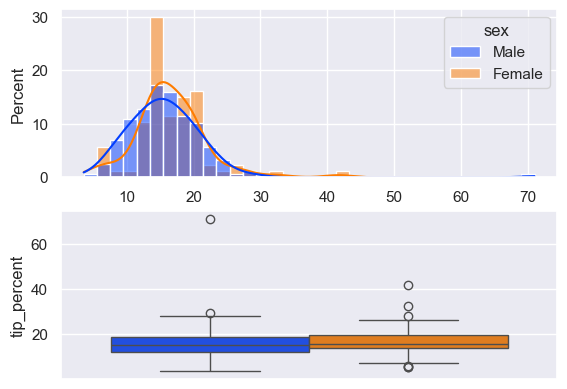

In [100]:
# Vytvoření nového sloupce, který počíta procento dýška z celkové účtenky
tips['tip_percent'] = tips.apply(lambda row: row.tip / row.total_bill * 100, axis=1)

# příjde mi trochu přehlednější mít zde i údaj samotné ceny bez dýška
tips['subtotal'] = tips.apply(lambda row: row.total_bill - row.tip, axis=1)

fig, ax = plt.subplots(2, 1)
sns.boxplot(data=tips, y='tip_percent', hue='sex',palette='bright', ax=ax[1],legend=False)
sns.histplot(data=tips, x='tip_percent',hue='sex',palette='bright',kde=True, stat='percent', common_norm=False, ax=ax[0])
plt.show()

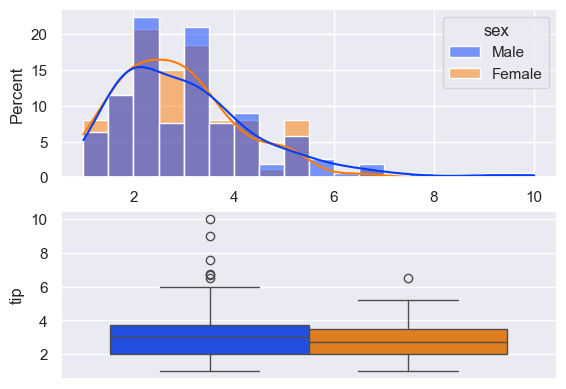

In [101]:
# Vypadá to, že ženy dávají průměrně větší procento ceny jako dýško
# Co když ale nebudeme brát ohled na cenu, jen na velikost dýška samotného?

fig, ax = plt.subplots(2, 1)
sns.histplot(data=tips, x='tip',hue='sex',palette='bright',kde=True, stat='percent', common_norm=False, ax=ax[0])
sns.boxplot(data=tips, y='tip',hue='sex',palette='bright',ax=ax[1],legend=False)
plt.show()

<Axes: xlabel='subtotal', ylabel='Percent'>

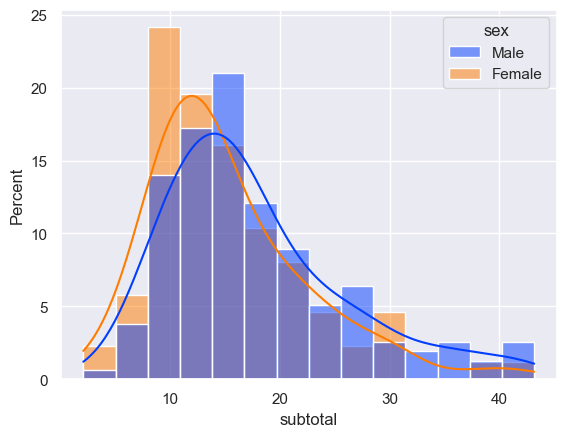

In [102]:
# Vidíme, že muži celkově nechají více peněz za dýško
# Je to ale tím, že si kupují dražší předměty?

# na grafu níže počítáme jen čistou cenu bez dýška
sns.histplot(data=tips, x='subtotal',hue='sex',palette='bright',kde=True, stat='percent', common_norm=False)

C:\Users\Martin\AppData\Local\Temp\ipykernel_41184\3020600838.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


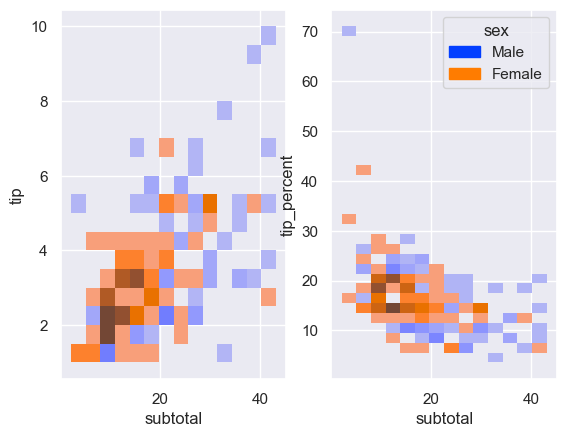

In [103]:
# Vypadá to, že muži v průměru utratí více, což může ovlivnit i velikost dýšek

fig, ax = plt.subplots(1, 2)
sns.histplot(data=tips, x='subtotal',y='tip',hue='sex',palette='bright', stat='percent', common_norm=False,ax=ax[0],legend=False)
sns.histplot(data=tips, x='subtotal',y='tip_percent',hue='sex',palette='bright', stat='percent', common_norm=False,ax=ax[1])
fig.show()

<Axes: xlabel='time', ylabel='tip'>

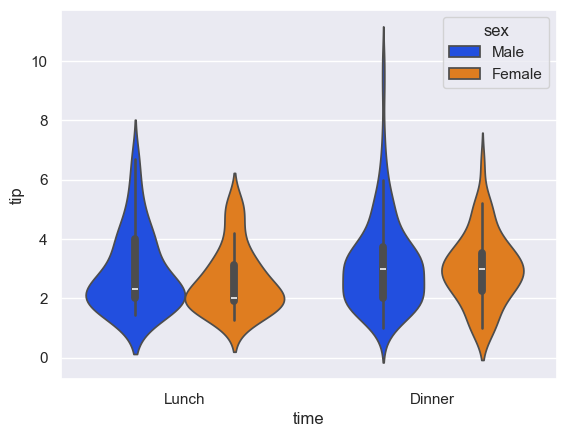

In [104]:
# Zdá se, že muži mají celkově větší rozptyl dýška
# na grafu v pravo vidíme, že s větší cenou účtenky procento dýška klesá u obou pohlaví
# u mužů ale klesá o něco méně - není zde dostatek dat, ale řekl bych,
# že muži u dražších objednávek zanechají větší procento ceny jako dýško

# Jak ovlivňuje denní doba velikost dýška?
sns.violinplot(data=tips, x='time', y='tip',palette='bright',hue='sex')

<Axes: xlabel='day', ylabel='tip'>

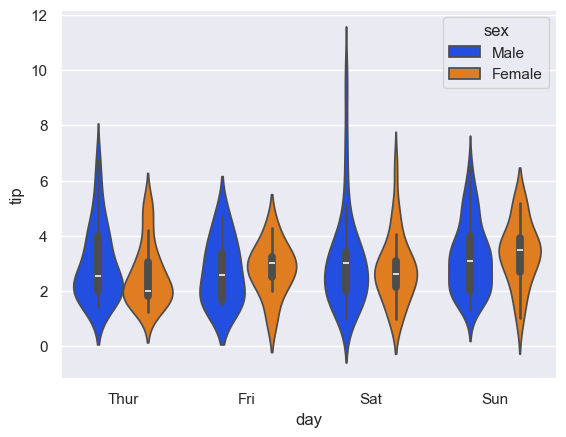

In [105]:
# Jak velké dýško dávají lidé podle dne v týdnu

sns.violinplot(data=tips, x='day', y='tip',hue='sex',palette='bright')

C:\Users\Martin\AppData\Local\Temp\ipykernel_41184\1046857144.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


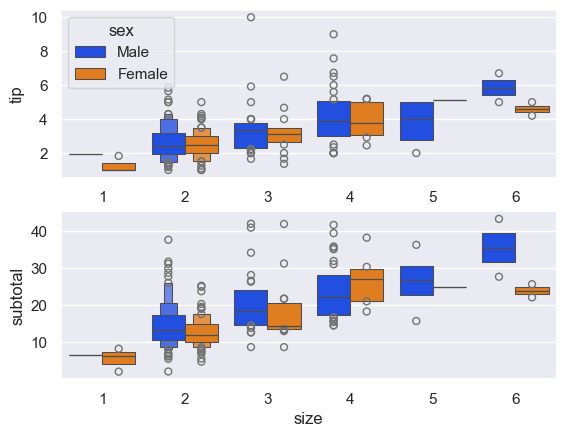

In [113]:
# Ovlivňuje počet osob u stolu velikost dýška?

fig, ax = plt.subplots(2, 1)
sns.boxenplot(data=tips, x='size', y='tip',hue='sex',palette='bright',ax=ax[0])
sns.boxenplot(data=tips, x='size', y='subtotal',hue='sex',palette='bright',ax=ax[1],legend=False)
fig.show()

<Axes: xlabel='size', ylabel='tip_percent'>

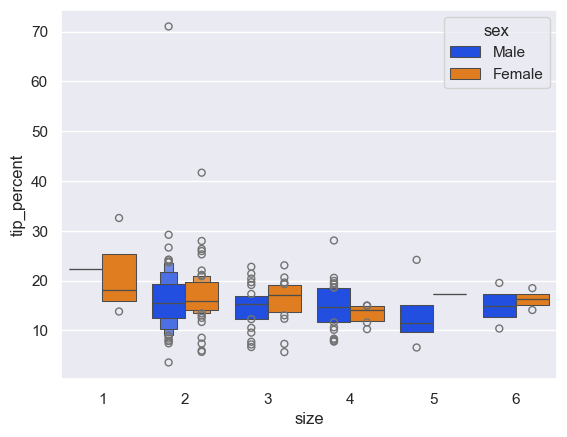

In [114]:
# S počtem lidí roste i velikost dýška, ale i celkové ceny
# podívám se ještě na procentuální velikost dýška 

sns.boxenplot(data=tips, x='size', y='tip_percent',hue='sex',palette='bright')

In [ ]:
# S počtem lidí se procentuální dýško trochu snižuje